In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('/kaggle/input/dataset/student_resource/dataset/train.csv')

In [ ]:
data.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data["price"][0]

4.890000000000001

In [ ]:
data["catalog_content"][0]

'Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n'

In [ ]:
import matplotlib.pyplot as plt

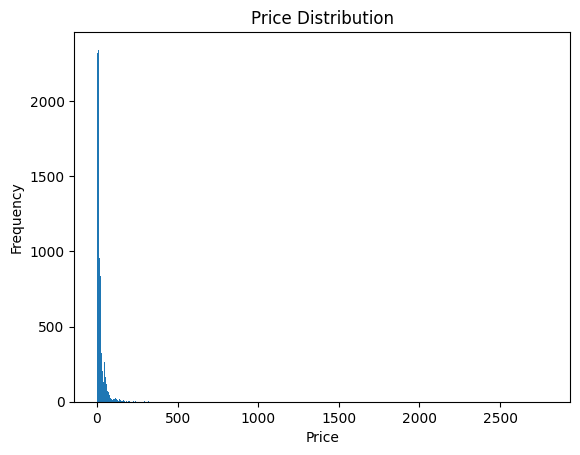

In [ ]:
data['price'].plot(kind='hist', bins=5000, title='Price Distribution')
plt.xlabel('Price')
plt.show()

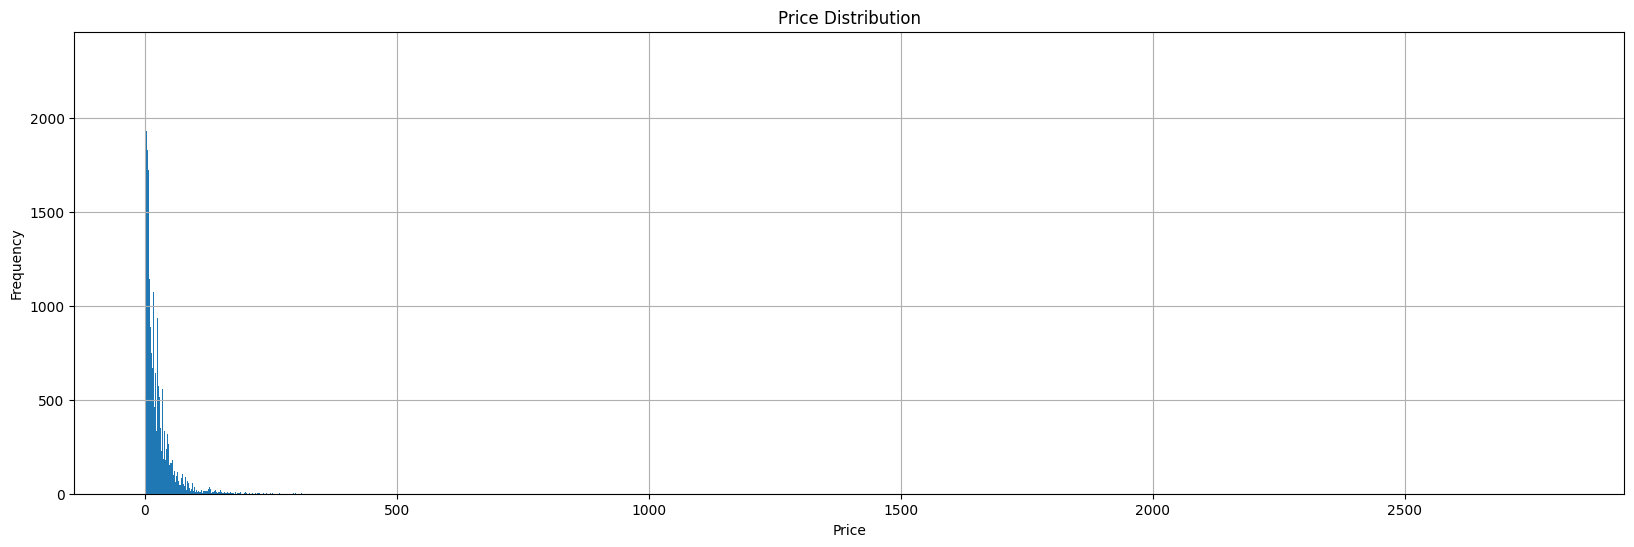

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))  # makes the plot larger
data['price'].plot(kind='hist', bins=5000, title='Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
data['price'].describe()


count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64

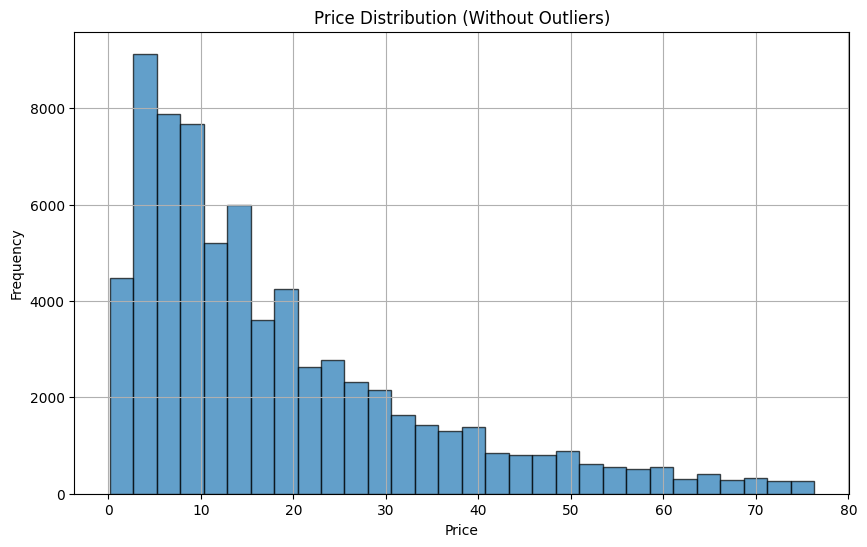

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_no_outliers['price'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7, title='Price Distribution (Without Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Make an explicit copy first
data_no_outliers = data.copy()

# Now safely add the new column
data_no_outliers.loc[:, 'price_log'] = np.log1p(data_no_outliers['price'])


In [ ]:
data_no_outliers

,sample_id,catalog_content,image_link,price,price_log
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,1.088562
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,3.444895
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490,4.211979
...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,2.433175
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,3.608753
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,3.938275
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,2.789630


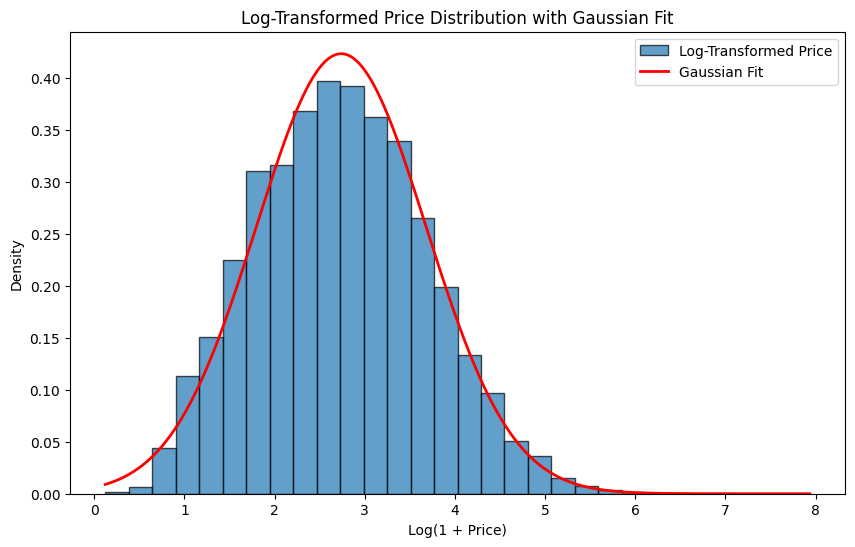

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Data
log_prices = data_no_outliers['price_log']

# Fit a normal distribution
mu, sigma = norm.fit(log_prices)

plt.figure(figsize=(10,6))

# Plot histogram (density=True so y-axis is probability density)
plt.hist(log_prices, bins=30, density=True, alpha=0.7, edgecolor='black', label='Log-Transformed Price')

# Plot Gaussian curve
x = np.linspace(log_prices.min(), log_prices.max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2, label='Gaussian Fit')

plt.title('Log-Transformed Price Distribution with Gaussian Fit')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
data.head()

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [ ]:
data_no_outliers.describe()

,sample_id,price,price_log
count,71305.000000,71305.000000,71305.000000
mean,150137.584377,18.396452,2.635188
std,87009.735412,15.903829,0.840602
min,0.000000,0.130000,0.122218
25%,73485.000000,6.490000,2.013569
50%,150182.000000,13.170000,2.651127
75%,226243.000000,25.350000,3.271468
max,299438.000000,76.300000,4.347694


In [ ]:
data_no_outliers

,sample_id,catalog_content,image_link,price,price_log
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,1.088562
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,3.444895
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490,4.211979
...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,2.433175
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,3.608753
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,3.938275
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,2.789630


In [ ]:
data_no_outliers['price'].describe()


count    71305.000000
mean        18.396452
std         15.903829
min          0.130000
25%          6.490000
50%         13.170000
75%         25.350000
max         76.300000
Name: price, dtype: float64

In [ ]:
import pandas as pd
import re
import string

# Function to clean text
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove emojis and other non-text characters
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Apply to the column
data_no_outliers['catalog_content'] = data_no_outliers['catalog_content'].apply(clean_text)


In [ ]:
data_no_outliers["catalog_content"][5]

'item name members mark members mark basil 625 oz\nbullet point 1 green herb italian staple great mixed with oregano\nbullet point 2 large size chef bottle\nbullet point 3 packed in the usa\nvalue 625\nunit ounce\n'

In [ ]:
!pip install transformers torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: n

In [ ]:
print("check")

check


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ==================== CONFIG ====================
CONFIG = {
    'bert_model': 'bert-base-uncased',
    'max_length': 256,
    'batch_size': 16,
    'epochs': 2,  # Changed to 2 epochs
    'learning_rate': 2e-5,
    'dropout': 0.3,
    'test_size': 0.2,
    'random_state': 42
}

# ==================== METRIC FUNCTIONS ====================
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """Calculate SMAPE - The competition metric!"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape = np.mean(np.abs(y_pred - y_true) / denominator) * 100
    return smape

# ==================== DATASET ====================
class ProductDataset(Dataset):
    def __init__(self, texts, prices, tokenizer, max_length):
        self.texts = texts
        self.prices = prices
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        price = self.prices[idx]

        # Tokenize
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'price': torch.tensor(price, dtype=torch.float)
        }

# ==================== MODEL ====================
class BERTPricePredictor(nn.Module):
    def __init__(self, bert_model_name, dropout=0.3):
        super(BERTPricePredictor, self).__init__()

        # Load pre-trained BERT
        self.bert = AutoModel.from_pretrained(bert_model_name)

        # Get BERT hidden size
        bert_hidden_size = self.bert.config.hidden_size  # 768 for bert-base

        # MLP for price prediction
        self.regressor = nn.Sequential(
            nn.Linear(bert_hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, input_ids, attention_mask):
        # Get BERT outputs
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        # Use [CLS] token representation (first token)
        cls_output = outputs.last_hidden_state[:, 0, :]

        # Predict price
        price = self.regressor(cls_output)

        return price.squeeze()

# ==================== TRAINING FUNCTIONS ====================
def train_epoch(model, dataloader, optimizer, scheduler, device, criterion):
    model.train()
    total_loss = 0
    predictions = []
    actuals = []

    progress_bar = tqdm(dataloader, desc='Training')

    for batch in progress_bar:
        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        prices = batch['price'].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)

        # Calculate loss
        loss = criterion(outputs, prices)

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # Track metrics
        total_loss += loss.item()
        predictions.extend(outputs.detach().cpu().numpy())
        actuals.extend(prices.cpu().numpy())

        progress_bar.set_postfix({'loss': loss.item()})

    avg_loss = total_loss / len(dataloader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = mean_absolute_percentage_error(actuals, predictions)
    smape = symmetric_mean_absolute_percentage_error(actuals, predictions)

    return avg_loss, rmse, mae, r2, mape, smape

def evaluate(model, dataloader, device, criterion):
    model.eval()
    total_loss = 0
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            prices = batch['price'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, prices)

            total_loss += loss.item()
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(prices.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = mean_absolute_percentage_error(actuals, predictions)
    smape = symmetric_mean_absolute_percentage_error(actuals, predictions)

    return avg_loss, rmse, mae, r2, mape, smape, predictions, actuals

# ==================== MAIN TRAINING ====================
def main(df=None):
    # Load your data
    if df is None:
        try:
            df = data_no_outliers.copy()
        except NameError:
            raise ValueError("Please pass your dataframe: main(data_no_outliers)")
    else:
        df = df.copy()

    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"\nPrice statistics:")
    print(df['price'].describe())

    # Prepare data
    X = df['catalog_content'].values
    y = df['price'].values

    # Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=CONFIG['test_size'],
        random_state=CONFIG['random_state']
    )

    print(f"\nTrain size: {len(X_train)}")
    print(f"Validation size: {len(X_val)}")

    # Load tokenizer
    print(f"\nLoading tokenizer: {CONFIG['bert_model']}")
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['bert_model'])

    # Create datasets
    train_dataset = ProductDataset(X_train, y_train, tokenizer, CONFIG['max_length'])
    val_dataset = ProductDataset(X_val, y_val, tokenizer, CONFIG['max_length'])

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=CONFIG['batch_size'],
        shuffle=True,
        num_workers=2
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=CONFIG['batch_size'],
        shuffle=False,
        num_workers=2
    )

    # Initialize model
    print(f"\nInitializing model: {CONFIG['bert_model']}")
    model = BERTPricePredictor(CONFIG['bert_model'], CONFIG['dropout'])
    model.to(device)

    # Loss function
    criterion = nn.MSELoss()

    # Optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG['learning_rate'])

    # Scheduler
    total_steps = len(train_loader) * CONFIG['epochs']
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    # Training loop
    print("\n" + "="*70)
    print("STARTING TRAINING - 2 EPOCHS")
    print("="*70)

    best_val_smape = float('inf')
    best_val_rmse = float('inf')
    history = {
        'train_loss': [], 'train_rmse': [], 'train_mae': [], 'train_r2': [], 'train_mape': [], 'train_smape': [],
        'val_loss': [], 'val_rmse': [], 'val_mae': [], 'val_r2': [], 'val_mape': [], 'val_smape': []
    }

    for epoch in range(CONFIG['epochs']):
        print(f"\n{'='*70}")
        print(f"EPOCH {epoch+1}/{CONFIG['epochs']}")
        print(f"{'='*70}")

        # Train
        train_loss, train_rmse, train_mae, train_r2, train_mape, train_smape = train_epoch(
            model, train_loader, optimizer, scheduler, device, criterion
        )

        # Validate
        val_loss, val_rmse, val_mae, val_r2, val_mape, val_smape, val_preds, val_actuals = evaluate(
            model, val_loader, device, criterion
        )

        # Save history
        history['train_loss'].append(train_loss)
        history['train_rmse'].append(train_rmse)
        history['train_mae'].append(train_mae)
        history['train_r2'].append(train_r2)
        history['train_mape'].append(train_mape)
        history['train_smape'].append(train_smape)
        history['val_loss'].append(val_loss)
        history['val_rmse'].append(val_rmse)
        history['val_mae'].append(val_mae)
        history['val_r2'].append(val_r2)
        history['val_mape'].append(val_mape)
        history['val_smape'].append(val_smape)

        # Print metrics
        print(f"\n📊 TRAINING RESULTS:")
        print(f"   Loss: {train_loss:.4f} | RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | R²: {train_r2:.4f}")
        print(f"   MAPE: {train_mape:.2f}% | SMAPE: {train_smape:.2f}%")

        print(f"\n📊 VALIDATION RESULTS:")
        print(f"   Loss: {val_loss:.4f} | RMSE: {val_rmse:.4f} | MAE: {val_mae:.4f} | R²: {val_r2:.4f}")
        print(f"   MAPE: {val_mape:.2f}% | SMAPE: {val_smape:.2f}% ⭐ (COMPETITION METRIC)")

        # Save best model based on SMAPE (competition metric)
        if val_smape < best_val_smape:
            best_val_smape = val_smape
            best_val_rmse = val_rmse
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_smape': val_smape,
                'val_rmse': val_rmse,
                'config': CONFIG
            }, 'best_bert_model.pt')
            print(f"\n✅ Best model saved! (Val SMAPE: {val_smape:.2f}%)")

    print("\n" + "="*70)
    print("🎉 TRAINING COMPLETE!")
    print("="*70)
    print(f"🏆 Best Validation SMAPE: {best_val_smape:.2f}% (Competition Metric)")
    print(f"📈 Best Validation RMSE: {best_val_rmse:.4f}")
    print(f"💾 Model saved as: best_bert_model.pt")
    print("="*70)

    return model, tokenizer, history

# ==================== PREDICTION FUNCTION ====================
def predict_prices(model, texts, tokenizer, device, batch_size=16):
    """Predict prices for new data"""
    model.eval()
    predictions = []

    # Create dummy prices for dataset
    dummy_prices = np.zeros(len(texts))
    dataset = ProductDataset(texts, dummy_prices, tokenizer, CONFIG['max_length'])
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask)
            predictions.extend(outputs.cpu().numpy())

    return np.array(predictions)

# ==================== RUN TRAINING ====================


    # Print final summary
    print("\n" + "="*70)
    print("📊 TRAINING SUMMARY")
    print("="*70)
    for epoch in range(len(history['val_smape'])):
        print(f"Epoch {epoch+1}:")
        print(f"  Val SMAPE: {history['val_smape'][epoch]:.2f}% | Val RMSE: {history['val_rmse'][epoch]:.4f}")
    print("="*70)

    # Optional: Load best model and predict on test set
    # checkpoint = torch.load('best_bert_model.pt')
    # model.load_state_dict(checkpoint['model_state_dict'])
    #
    # test_df = pd.read_csv('test.csv')
    # test_predictions = predict_prices(model, test_df['catalog_content'].values, tokenizer, device)
    #
    # # Ensure positive prices (competition requirement)
    # test_predictions = np.abs(test_predictions)
    #
    # submission = pd.DataFrame({
    #     'sample_id': test_df['sample_id'],
    #     'price': test_predictions
    # })
    # submission.to_csv('submission.csv', index=False)
    # print("\n✅ Submission file created: submission.csv")

Using device: cuda


In [ ]:
if __name__ == "__main__":
    model, tokenizer, history = main()

Dataset shape: (71305, 5)
Columns: ['sample_id', 'catalog_content', 'image_link', 'price', 'price_log']

Price statistics:
count    71305.000000
mean        18.396452
std         15.903829
min          0.130000
25%          6.490000
50%         13.170000
75%         25.350000
max         76.300000
Name: price, dtype: float64

Train size: 57044
Validation size: 14261

Loading tokenizer: bert-base-uncased

Initializing model: bert-base-uncased

STARTING TRAINING - 2 EPOCHS

EPOCH 1/2


Evaluating: 100%|██████████| 892/892 [03:13<00:00,  4.61it/s]



📊 TRAINING RESULTS:
   Loss: 217.2959 | RMSE: 14.7424 | MAE: 10.6264 | R²: 0.1384
   MAPE: 114.61% | SMAPE: 64.46%

📊 VALIDATION RESULTS:
   Loss: 162.1415 | RMSE: 12.7366 | MAE: 9.0831 | R²: 0.3653
   MAPE: 101.68% | SMAPE: 54.94% ⭐ (COMPETITION METRIC)

✅ Best model saved! (Val SMAPE: 54.94%)

EPOCH 2/2


Evaluating: 100%|██████████| 892/892 [03:13<00:00,  4.61it/s]



📊 TRAINING RESULTS:
   Loss: 155.4369 | RMSE: 12.4681 | MAE: 8.8416 | R²: 0.3838
   MAPE: 97.83% | SMAPE: 53.81%

📊 VALIDATION RESULTS:
   Loss: 151.2268 | RMSE: 12.2998 | MAE: 8.5428 | R²: 0.4081
   MAPE: 95.56% | SMAPE: 52.66% ⭐ (COMPETITION METRIC)

✅ Best model saved! (Val SMAPE: 52.66%)

🎉 TRAINING COMPLETE!
🏆 Best Validation SMAPE: 52.66% (Competition Metric)
📈 Best Validation RMSE: 12.2998
💾 Model saved as: best_bert_model.pt


In [ ]:
Q1 = data_no_outliers['price'].quantile(0.25)
Q3 = data_no_outliers['price'].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter data
data_no_outliers = data_no_outliers[(data_no_outliers['price'] >= lower_limit) & (data_no_outliers['price'] <= upper_limit)]

print("Before:", len(data_no_outliers))
print("After removing outliers:", len(data_no_outliers))

Before: 69476
After removing outliers: 69476


In [ ]:
data_no_outliers

,sample_id,catalog_content,image_link,price,price_log
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,1.773256
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,2.647592
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,1.088562
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,3.444895
5,9259,"Item Name: Member's Mark Member's Mark, Basil,...",https://m.media-amazon.com/images/I/81nw0HXpCR...,18.500,2.970414
...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,2.433175
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,3.608753
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,3.938275
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,2.789630


In [ ]:
data_no_outliers = data.copy()

In [ ]:
data_no_outliers

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490
...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275


In [ ]:
data_no_outliers.loc[:, 'price_log'] = np.log1p(data_no_outliers['price'])

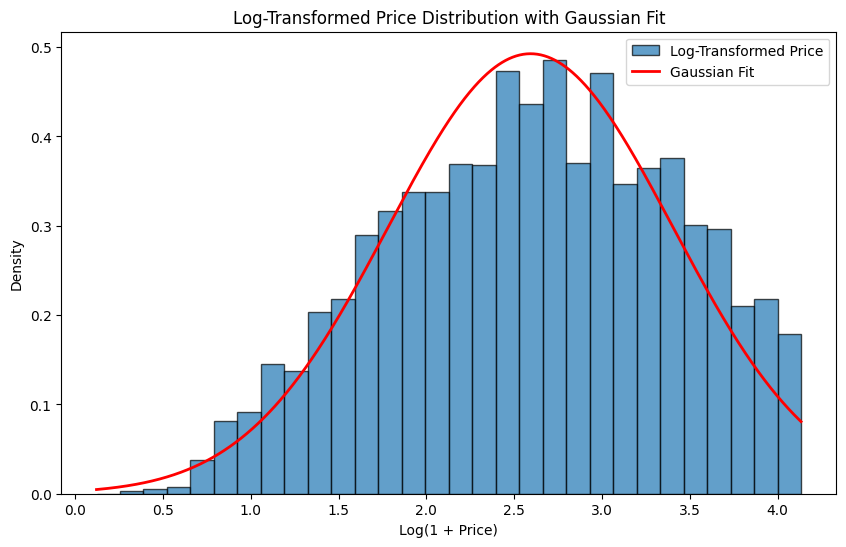

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Data
log_prices = data_no_outliers['price_log']

# Fit a normal distribution
mu, sigma = norm.fit(log_prices)

plt.figure(figsize=(10,6))

# Plot histogram (density=True so y-axis is probability density)
plt.hist(log_prices, bins=30, density=True, alpha=0.7, edgecolor='black', label='Log-Transformed Price')

# Plot Gaussian curve
x = np.linspace(log_prices.min(), log_prices.max(), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r', linewidth=2, label='Gaussian Fit')

plt.title('Log-Transformed Price Distribution with Gaussian Fit')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
!pip install transformers torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 42.0 MB/s eta 0:00:00
  Attempting uninstall: 

In [ ]:
!pip install transformers==4.35.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 kB 3.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 69.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 75.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.35.3
    Uninstalling huggingface-hub-0.35.3:
      Successfully uninstalled huggingface-hub-0.35.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.3
    Uninstalling transformers-4.53.3:
      Successfully uninstalled transformers-4.53.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [ ]:
# Cell 1: Install specific version
!pip uninstall transformers -y
!pip install transformers==4.41.2

# Cell 2: Restart kernel (Click Runtime -> Restart)

# Cell 3: Run your training code

Found existing installation: transformers 4.35.0
Uninstalling transformers-4.35.0:
  Successfully uninstalled transformers-4.35.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.3 MB/s eta 0:00:00
  Using cached huggingface_hub-0.35.3-py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.5 MB/s eta 0:00:00:00:010:01
Using cached huggingface_hub-0.35.3-py3-none-any.whl (564 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.14.1
    Uninstalling tokenizers-0.14.1:
      Successfully uninstalled tokenizers-0.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

In [ ]:
data_no_outliers['catalog_content'][5]

"Item Name: Member's Mark Member's Mark, Basil, 6.25 oz\nBullet Point 1: Green Herb, Italian Staple, Great mixed with Oregano\nBullet Point 2: Large Size, Chef Bottle\nBullet Point 3: Packed in the USA\nValue: 6.25\nUnit: ounce\n"

In [ ]:
!pip install transformers==4.41.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 92.6 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
gradio 5.38.1 requires pydantic<2.12,>=2.0, but you have pydantic 2.12.0a1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ==================== CONFIG ====================
CONFIG = {
    'bert_model': 'distilbert-base-uncased',  # Changed to DistilBERT to avoid tokenizer issues
    'max_length': 256,
    'batch_size': 16,
    'epochs': 2,
    'learning_rate': 2e-5,
    'dropout': 0.3,
    'test_size': 0.2,
    'random_state': 42,
    'use_log_transform': True  # NEW: Enable log transformation
}

# ==================== METRIC FUNCTIONS ====================
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """Calculate SMAPE - The competition metric!"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Avoid division by zero
    mask = denominator > 0
    smape = np.mean(np.abs(y_pred[mask] - y_true[mask]) / denominator[mask]) * 100
    return smape

# ==================== DATASET ====================
class ProductDataset(Dataset):
    def __init__(self, texts, prices, tokenizer, max_length):
        self.texts = texts
        self.prices = prices
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        price = self.prices[idx]

        # Tokenize
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'price': torch.tensor(price, dtype=torch.float)
        }

# ==================== MODEL ====================
class BERTPricePredictor(nn.Module):
    def __init__(self, bert_model_name, dropout=0.3):
        super(BERTPricePredictor, self).__init__()

        # Load pre-trained BERT
        self.bert = AutoModel.from_pretrained(bert_model_name)

        # Get BERT hidden size
        bert_hidden_size = self.bert.config.hidden_size  # 768 for bert-base

        # MLP for price prediction
        self.regressor = nn.Sequential(
            nn.Linear(bert_hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, input_ids, attention_mask):
        # Get BERT outputs
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        # Use [CLS] token representation (first token)
        cls_output = outputs.last_hidden_state[:, 0, :]

        # Predict price
        price = self.regressor(cls_output)

        return price.squeeze()

# ==================== TRAINING FUNCTIONS ====================
def train_epoch(model, dataloader, optimizer, scheduler, device, criterion, use_log):
    model.train()
    total_loss = 0
    predictions = []
    actuals = []

    progress_bar = tqdm(dataloader, desc='Training')

    for batch in progress_bar:
        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        prices = batch['price'].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)

        # Calculate loss
        loss = criterion(outputs, prices)

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # Track metrics (convert back from log if needed)
        total_loss += loss.item()
        pred_np = outputs.detach().cpu().numpy()
        actual_np = prices.cpu().numpy()

        # Convert from log to original scale for metrics
        if use_log:
            pred_np = np.expm1(pred_np)
            actual_np = np.expm1(actual_np)

        predictions.extend(pred_np)
        actuals.extend(actual_np)

        progress_bar.set_postfix({'loss': loss.item()})

    avg_loss = total_loss / len(dataloader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = mean_absolute_percentage_error(actuals, predictions)
    smape = symmetric_mean_absolute_percentage_error(actuals, predictions)

    return avg_loss, rmse, mae, r2, mape, smape

def evaluate(model, dataloader, device, criterion, use_log):
    model.eval()
    total_loss = 0
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            prices = batch['price'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, prices)

            total_loss += loss.item()

            pred_np = outputs.cpu().numpy()
            actual_np = prices.cpu().numpy()

            # Convert from log to original scale for metrics
            if use_log:
                pred_np = np.expm1(pred_np)
                actual_np = np.expm1(actual_np)

            predictions.extend(pred_np)
            actuals.extend(actual_np)

    avg_loss = total_loss / len(dataloader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = mean_absolute_percentage_error(actuals, predictions)
    smape = symmetric_mean_absolute_percentage_error(actuals, predictions)

    return avg_loss, rmse, mae, r2, mape, smape, predictions, actuals

# ==================== MAIN TRAINING ====================
def main(df=None):
    # Load your data
    if df is None:
        try:
            df = data_no_outliers.copy()
        except NameError:
            raise ValueError("Please pass your dataframe: main(data_no_outliers)")
    else:
        df = df.copy()

    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"\nPrice statistics:")
    print(df['price'].describe())

    # Prepare data
    X = df['catalog_content'].values

    # Apply log transformation if enabled
    if CONFIG['use_log_transform']:
        print("\n✅ Using LOG TRANSFORMATION for prices")
        y = np.log1p(df['price'].values)  # log(1 + price)
    else:
        print("\n❌ NOT using log transformation")
        y = df['price'].values

    # Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=CONFIG['test_size'],
        random_state=CONFIG['random_state']
    )

    print(f"\nTrain size: {len(X_train)}")
    print(f"Validation size: {len(X_val)}")

    # Load tokenizer with workaround for HuggingFace Hub error
    print(f"\nLoading tokenizer: {CONFIG['bert_model']}")

    try:
        # Try normal loading first
        tokenizer = AutoTokenizer.from_pretrained(CONFIG['bert_model'])
        print("✅ Tokenizer loaded successfully")
    except Exception as e:
        print(f"⚠️ Error loading tokenizer: {str(e)[:100]}")
        print("Trying alternative methods...")

        # Fallback 1: Use cached version
        try:
            tokenizer = AutoTokenizer.from_pretrained(CONFIG['bert_model'], local_files_only=True)
            print("✅ Loaded from cache")
        except:
            # Fallback 2: Use distilbert (compatible tokenizer)
            print("Switching to distilbert-base-uncased...")
            CONFIG['bert_model'] = 'distilbert-base-uncased'
            tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
            print("✅ Using DistilBERT tokenizer instead")

    # Create datasets
    train_dataset = ProductDataset(X_train, y_train, tokenizer, CONFIG['max_length'])
    val_dataset = ProductDataset(X_val, y_val, tokenizer, CONFIG['max_length'])

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=CONFIG['batch_size'],
        shuffle=True,
        num_workers=2
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=CONFIG['batch_size'],
        shuffle=False,
        num_workers=2
    )

    # Initialize model
    print(f"\nInitializing model: {CONFIG['bert_model']}")
    model = BERTPricePredictor(CONFIG['bert_model'], CONFIG['dropout'])
    model.to(device)

    # Loss function
    criterion = nn.MSELoss()

    # Optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG['learning_rate'])

    # Scheduler
    total_steps = len(train_loader) * CONFIG['epochs']
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    # Training loop
    print("\n" + "="*70)
    print("STARTING TRAINING - 2 EPOCHS (WITH LOG TRANSFORM)")
    print("="*70)

    best_val_smape = float('inf')
    best_val_rmse = float('inf')
    history = {
        'train_loss': [], 'train_rmse': [], 'train_mae': [], 'train_r2': [], 'train_mape': [], 'train_smape': [],
        'val_loss': [], 'val_rmse': [], 'val_mae': [], 'val_r2': [], 'val_mape': [], 'val_smape': []
    }

    for epoch in range(CONFIG['epochs']):
        print(f"\n{'='*70}")
        print(f"EPOCH {epoch+1}/{CONFIG['epochs']}")
        print(f"{'='*70}")

        # Train
        train_loss, train_rmse, train_mae, train_r2, train_mape, train_smape = train_epoch(
            model, train_loader, optimizer, scheduler, device, criterion, CONFIG['use_log_transform']
        )

        # Validate
        val_loss, val_rmse, val_mae, val_r2, val_mape, val_smape, val_preds, val_actuals = evaluate(
            model, val_loader, device, criterion, CONFIG['use_log_transform']
        )

        # Save history
        history['train_loss'].append(train_loss)
        history['train_rmse'].append(train_rmse)
        history['train_mae'].append(train_mae)
        history['train_r2'].append(train_r2)
        history['train_mape'].append(train_mape)
        history['train_smape'].append(train_smape)
        history['val_loss'].append(val_loss)
        history['val_rmse'].append(val_rmse)
        history['val_mae'].append(val_mae)
        history['val_r2'].append(val_r2)
        history['val_mape'].append(val_mape)
        history['val_smape'].append(val_smape)

        # Print metrics
        print(f"\n📊 TRAINING RESULTS:")
        print(f"   Loss: {train_loss:.4f} | RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | R²: {train_r2:.4f}")
        print(f"   MAPE: {train_mape:.2f}% | SMAPE: {train_smape:.2f}%")

        print(f"\n📊 VALIDATION RESULTS:")
        print(f"   Loss: {val_loss:.4f} | RMSE: {val_rmse:.4f} | MAE: {val_mae:.4f} | R²: {val_r2:.4f}")
        print(f"   MAPE: {val_mape:.2f}% | SMAPE: {val_smape:.2f}% ⭐ (COMPETITION METRIC)")

        # Save best model based on SMAPE (competition metric)
        if val_smape < best_val_smape:
            best_val_smape = val_smape
            best_val_rmse = val_rmse
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_smape': val_smape,
                'val_rmse': val_rmse,
                'config': CONFIG
            }, 'best_bert_model_log.pt')
            print(f"\n✅ Best model saved! (Val SMAPE: {val_smape:.2f}%)")

    print("\n" + "="*70)
    print("🎉 TRAINING COMPLETE!")
    print("="*70)
    print(f"🏆 Best Validation SMAPE: {best_val_smape:.2f}% (Competition Metric)")
    print(f"📈 Best Validation RMSE: {best_val_rmse:.4f}")
    print(f"💾 Model saved as: best_bert_model_log.pt")
    print("="*70)

    return model, tokenizer, history

# ==================== PREDICTION FUNCTION ====================
def predict_prices(model, texts, tokenizer, device, use_log_transform=True, batch_size=16):
    """Predict prices for new data"""
    model.eval()
    predictions = []

    # Create dummy prices for dataset
    dummy_prices = np.zeros(len(texts))
    dataset = ProductDataset(texts, dummy_prices, tokenizer, CONFIG['max_length'])
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask)
            pred_np = outputs.cpu().numpy()

            # Convert from log to original scale if using log transform
            if use_log_transform:
                pred_np = np.expm1(pred_np)  # exp(x) - 1

            predictions.extend(pred_np)

    return np.array(predictions)

# ==================== RUN TRAINING ====================
if __name__ == "__main__":
    # Train the model
    model, tokenizer, history = main(data_no_outliers)

    # Print final summary
    print("\n" + "="*70)
    print("📊 TRAINING SUMMARY")
    print("="*70)
    for epoch in range(len(history['val_smape'])):
        print(f"Epoch {epoch+1}:")
        print(f"  Val SMAPE: {history['val_smape'][epoch]:.2f}% | Val RMSE: {history['val_rmse'][epoch]:.4f}")
    print("="*70)

# ==================== INFERENCE ON TEST SET ====================
# Uncomment below when you want to create submission file

# # Load best model
# checkpoint = torch.load('best_bert_model_log.pt')
# model.load_state_dict(checkpoint['model_state_dict'])
#
# # Load test data
# test_df = pd.read_csv('test.csv')
#
# # Predict prices (with log transform conversion)
# test_predictions = predict_prices(
#     model,
#     test_df['catalog_content'].values,
#     tokenizer,
#     device,
#     use_log_transform=CONFIG['use_log_transform']
# )
#
# # Ensure positive prices (competition requirement)
# test_predictions = np.maximum(test_predictions, 0)
#
# # Create submission file
# submission = pd.DataFrame({
#     'sample_id': test_df['sample_id'],
#     'price': test_predictions
# })
# submission.to_csv('submission.csv', index=False)
# print("\n✅ Submission file created: submission.csv")
# print(f"Price range: ${test_predictions.min():.2f} - ${test_predictions.max():.2f}")

Using device: cuda
Dataset shape: (69476, 5)
Columns: ['sample_id', 'catalog_content', 'image_link', 'price', 'price_log']

Price statistics:
count    69476.000000
mean        17.080596
std         13.842866
min          0.130000
25%          6.318750
50%         12.970000
75%         24.040000
max         61.370000
Name: price, dtype: float64

✅ Using LOG TRANSFORMATION for prices

Train size: 55580
Validation size: 13896

Loading tokenizer: distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

✅ Tokenizer loaded successfully

Initializing model: distilbert-base-uncased


2025-10-11 05:35:04.392777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760160904.579939      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760160904.631344      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]


STARTING TRAINING - 2 EPOCHS (WITH LOG TRANSFORM)

EPOCH 1/2


Evaluating: 100%|██████████| 869/869 [01:35<00:00,  9.11it/s]



📊 TRAINING RESULTS:
   Loss: 0.6447 | RMSE: 14.3959 | MAE: 9.9708 | R²: -0.0845
   MAPE: 88.91% | SMAPE: 62.86%

📊 VALIDATION RESULTS:
   Loss: 0.4006 | RMSE: 11.8948 | MAE: 7.8806 | R²: 0.2695
   MAPE: 62.48% | SMAPE: 50.52% ⭐ (COMPETITION METRIC)

✅ Best model saved! (Val SMAPE: 50.52%)

EPOCH 2/2


Evaluating: 100%|██████████| 869/869 [01:35<00:00,  9.10it/s]



📊 TRAINING RESULTS:
   Loss: 0.4524 | RMSE: 12.9948 | MAE: 8.7573 | R²: 0.1164
   MAPE: 73.42% | SMAPE: 53.81%

📊 VALIDATION RESULTS:
   Loss: 0.3685 | RMSE: 11.1573 | MAE: 7.4809 | R²: 0.3573
   MAPE: 63.74% | SMAPE: 48.17% ⭐ (COMPETITION METRIC)

✅ Best model saved! (Val SMAPE: 48.17%)

🎉 TRAINING COMPLETE!
🏆 Best Validation SMAPE: 48.17% (Competition Metric)
📈 Best Validation RMSE: 11.1573
💾 Model saved as: best_bert_model_log.pt

📊 TRAINING SUMMARY
Epoch 1:
  Val SMAPE: 50.52% | Val RMSE: 11.8948
Epoch 2:
  Val SMAPE: 48.17% | Val RMSE: 11.1573


In [ ]:
# ==================== CONTINUE TRAINING FROM CHECKPOINT ====================
def continue_training(checkpoint_path, df, additional_epochs=1):
    """Continue training from a saved checkpoint"""

    print(f"Loading checkpoint from: {checkpoint_path}")
    checkpoint = torch.load(checkpoint_path, weights_only=False)

    # Prepare data (same as before)
    X = df['catalog_content'].values
    if CONFIG['use_log_transform']:
        y = np.log1p(df['price'].values)
    else:
        y = df['price'].values

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=CONFIG['test_size'], random_state=CONFIG['random_state']
    )

    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['bert_model'])

    # Create datasets and dataloaders
    train_dataset = ProductDataset(X_train, y_train, tokenizer, CONFIG['max_length'])
    val_dataset = ProductDataset(X_val, y_val, tokenizer, CONFIG['max_length'])

    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=CONFIG['batch_size'], shuffle=False, num_workers=2)

    # Recreate model
    model = BERTPricePredictor(CONFIG['bert_model'], CONFIG['dropout'])
    model.to(device)

    # Load saved weights
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"✅ Loaded model from epoch {checkpoint['epoch'] + 1}")
    print(f"   Previous best val SMAPE: {checkpoint['val_smape']:.2f}%")

    # Recreate optimizer
    optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG['learning_rate'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Create scheduler for remaining epochs
    total_steps = len(train_loader) * additional_epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=0, num_training_steps=total_steps
    )

    criterion = nn.MSELoss()

    # Track best metrics
    best_val_smape = checkpoint['val_smape']
    start_epoch = checkpoint['epoch'] + 1

    print(f"\n{'='*70}")
    print(f"CONTINUING TRAINING FOR {additional_epochs} MORE EPOCH(S)")
    print(f"Starting from epoch {start_epoch + 1}")
    print(f"{'='*70}\n")

    # Training loop
    for epoch in range(additional_epochs):
        current_epoch = start_epoch + epoch + 1
        print(f"\n{'='*70}")
        print(f"EPOCH {current_epoch} (Continuation)")
        print(f"{'='*70}")

        # Train
        train_loss, train_rmse, train_mae, train_r2, train_mape, train_smape = train_epoch(
            model, train_loader, optimizer, scheduler, device, criterion, CONFIG['use_log_transform']
        )

        # Validate
        val_loss, val_rmse, val_mae, val_r2, val_mape, val_smape, _, _ = evaluate(
            model, val_loader, device, criterion, CONFIG['use_log_transform']
        )

        # Print metrics
        print(f"\n📊 TRAINING RESULTS:")
        print(f"   Loss: {train_loss:.4f} | RMSE: {train_rmse:.4f} | MAE: {train_mae:.4f} | R²: {train_r2:.4f}")
        print(f"   MAPE: {train_mape:.2f}% | SMAPE: {train_smape:.2f}%")

        print(f"\n📊 VALIDATION RESULTS:")
        print(f"   Loss: {val_loss:.4f} | RMSE: {val_rmse:.4f} | MAE: {val_mae:.4f} | R²: {val_r2:.4f}")
        print(f"   MAPE: {val_mape:.2f}% | SMAPE: {val_smape:.2f}% ⭐")

        # Save if better
        if val_smape < best_val_smape:
            best_val_smape = val_smape
            torch.save({
                'epoch': current_epoch - 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_smape': val_smape,
                'val_rmse': val_rmse,
                'config': CONFIG
            }, 'best_bert_model_log.pt')
            print(f"\n✅ Improved! New best model saved! (Val SMAPE: {val_smape:.2f}%)")
        else:
            print(f"\n⚠️ No improvement (Best SMAPE: {best_val_smape:.2f}%)")

    print(f"\n🎉 Training continuation complete!")
    print(f"🏆 Best SMAPE: {best_val_smape:.2f}%")

    return model, tokenizer


In [ ]:
# Add the continue_training function to your code, then run:
model, tokenizer = continue_training('best_bert_model_log.pt', data_no_outliers, additional_epochs=1)

Loading checkpoint from: best_bert_model_log.pt
✅ Loaded model from epoch 2
   Previous best val SMAPE: 48.17%

CONTINUING TRAINING FOR 1 MORE EPOCH(S)
Starting from epoch 3


EPOCH 3 (Continuation)


Evaluating: 100%|██████████| 869/869 [01:35<00:00,  9.10it/s]



📊 TRAINING RESULTS:
   Loss: 0.4250 | RMSE: 12.7439 | MAE: 8.5379 | R²: 0.1502
   MAPE: 70.02% | SMAPE: 52.37%

📊 VALIDATION RESULTS:
   Loss: 0.3613 | RMSE: 11.0283 | MAE: 7.3128 | R²: 0.3721
   MAPE: 60.52% | SMAPE: 47.16% ⭐

✅ Improved! New best model saved! (Val SMAPE: 47.16%)

🎉 Training continuation complete!
🏆 Best SMAPE: 47.16%


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ==================== CONFIG ====================
CONFIG = {
    'bert_model': 'distilbert-base-uncased',
    'max_length': 256,
    'batch_size': 16,
    'epochs': 3,
    'learning_rate': 2e-5,
    'dropout': 0.3,
    'test_size': 0.2,
    'random_state': 42,
    'use_log_transform': True,
    'n_clusters': 20,  # NEW: Number of clusters
    'cluster_embed_dim': 64  # NEW: Cluster embedding dimension
}

# ==================== METRIC FUNCTIONS ====================
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denominator > 0
    smape = np.mean(np.abs(y_pred[mask] - y_true[mask]) / denominator[mask]) * 100
    return smape

# ==================== CLUSTERING FUNCTIONS ====================
def extract_bert_embeddings(texts, model_name, tokenizer, device, batch_size=32, max_length=256):
    """
    Extract BERT [CLS] embeddings for clustering
    """
    print(f"\n🔍 Extracting BERT embeddings for {len(texts)} samples...")

    # Load model for embedding extraction
    bert_model = AutoModel.from_pretrained(model_name)
    bert_model.to(device)
    bert_model.eval()

    embeddings = []

    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size), desc='Extracting embeddings'):
            batch_texts = texts[i:i+batch_size]

            # Tokenize
            encoding = tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                max_length=max_length,
                return_tensors='pt'
            )

            input_ids = encoding['input_ids'].to(device)
            attention_mask = encoding['attention_mask'].to(device)

            # Get [CLS] embeddings
            outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

            embeddings.append(cls_embeddings)

    # Clean up
    del bert_model
    torch.cuda.empty_cache()

    embeddings = np.vstack(embeddings)
    print(f"✅ Extracted embeddings shape: {embeddings.shape}")

    return embeddings

def perform_clustering(embeddings, n_clusters=20):
    """
    Perform K-Means clustering on embeddings
    """
    print(f"\n🎯 Performing K-Means clustering with {n_clusters} clusters...")

    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=42,
        n_init=10,
        max_iter=300,
        verbose=0
    )

    cluster_labels = kmeans.fit_predict(embeddings)

    print(f"✅ Clustering complete!")
    print(f"\nCluster distribution:")
    unique, counts = np.unique(cluster_labels, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        print(f"   Cluster {cluster_id:2d}: {count:5d} samples ({count/len(cluster_labels)*100:.1f}%)")

    return kmeans, cluster_labels

def analyze_clusters(df, cluster_labels, n_samples=3):
    """
    Analyze what each cluster contains
    """
    print(f"\n📊 CLUSTER ANALYSIS:")
    print("="*80)

    df_with_clusters = df.copy()
    df_with_clusters['cluster_id'] = cluster_labels

    for i in range(CONFIG['n_clusters']):
        cluster_data = df_with_clusters[df_with_clusters['cluster_id'] == i]

        print(f"\n🏷️  CLUSTER {i} ({len(cluster_data)} samples)")
        print(f"   Price range: ${cluster_data['price'].min():.2f} - ${cluster_data['price'].max():.2f}")
        print(f"   Mean price: ${cluster_data['price'].mean():.2f}")
        print(f"   Median price: ${cluster_data['price'].median():.2f}")
        print(f"\n   Sample products:")

        for idx, row in cluster_data.head(n_samples).iterrows():
            text_preview = row['catalog_content'][:80] + "..."
            print(f"   • ${row['price']:.2f} - {text_preview}")

# ==================== NEW DATASET WITH CLUSTERS ====================
class ProductDataset_WithClusters(Dataset):
    def __init__(self, texts, prices, cluster_ids, tokenizer, max_length):
        self.texts = texts
        self.prices = prices
        self.cluster_ids = cluster_ids
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        price = self.prices[idx]
        cluster_id = self.cluster_ids[idx]

        # Tokenize
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'cluster_id': torch.tensor(cluster_id, dtype=torch.long),
            'price': torch.tensor(price, dtype=torch.float)
        }

# ==================== NEW MODEL WITH CLUSTERING ====================
class BERTPricePredictor_WithClusters(nn.Module):
    def __init__(self, bert_model_name, n_clusters=20, cluster_embed_dim=64, dropout=0.3):
        super(BERTPricePredictor_WithClusters, self).__init__()

        # Load pre-trained BERT
        self.bert = AutoModel.from_pretrained(bert_model_name)

        # Get BERT hidden size
        bert_hidden_size = self.bert.config.hidden_size  # 768 for distilbert

        # Cluster embedding layer
        self.cluster_embedding = nn.Embedding(n_clusters, cluster_embed_dim)

        # Combined size
        total_size = bert_hidden_size + cluster_embed_dim  # 768 + 64 = 832

        # MLP for price prediction
        self.regressor = nn.Sequential(
            nn.Linear(total_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, input_ids, attention_mask, cluster_ids):
        # Get BERT outputs
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        # Use [CLS] token representation
        cls_output = outputs.last_hidden_state[:, 0, :]  # [batch, 768]

        # Get cluster embeddings
        cluster_emb = self.cluster_embedding(cluster_ids)  # [batch, 64]

        # Concatenate BERT + cluster embeddings
        combined = torch.cat([cls_output, cluster_emb], dim=1)  # [batch, 832]

        # Predict price
        price = self.regressor(combined)

        return price.squeeze()

# ==================== TRAINING FUNCTIONS ====================
def train_epoch_with_clusters(model, dataloader, optimizer, scheduler, device, criterion, use_log):
    model.train()
    total_loss = 0
    predictions = []
    actuals = []

    progress_bar = tqdm(dataloader, desc='Training')

    for batch in progress_bar:
        # Move to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        cluster_ids = batch['cluster_id'].to(device)
        prices = batch['price'].to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, cluster_ids)

        # Calculate loss
        loss = criterion(outputs, prices)

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # Track metrics
        total_loss += loss.item()
        pred_np = outputs.detach().cpu().numpy()
        actual_np = prices.cpu().numpy()

        # Convert from log if needed
        if use_log:
            pred_np = np.expm1(pred_np)
            actual_np = np.expm1(actual_np)

        predictions.extend(pred_np)
        actuals.extend(actual_np)

        progress_bar.set_postfix({'loss': loss.item()})

    avg_loss = total_loss / len(dataloader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = mean_absolute_percentage_error(actuals, predictions)
    smape = symmetric_mean_absolute_percentage_error(actuals, predictions)

    return avg_loss, rmse, mae, r2, mape, smape

def evaluate_with_clusters(model, dataloader, device, criterion, use_log):
    model.eval()
    total_loss = 0
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Evaluating'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            cluster_ids = batch['cluster_id'].to(device)
            prices = batch['price'].to(device)

            outputs = model(input_ids, attention_mask, cluster_ids)
            loss = criterion(outputs, prices)

            total_loss += loss.item()
            pred_np = outputs.cpu().numpy()
            actual_np = prices.cpu().numpy()

            if use_log:
                pred_np = np.expm1(pred_np)
                actual_np = np.expm1(actual_np)

            predictions.extend(pred_np)
            actuals.extend(actual_np)

    avg_loss = total_loss / len(dataloader)
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = mean_absolute_percentage_error(actuals, predictions)
    smape = symmetric_mean_absolute_percentage_error(actuals, predictions)

    return avg_loss, rmse, mae, r2, mape, smape, predictions, actuals

# ==================== MAIN: CREATE CLUSTERS & TRAIN ====================
def train_with_clusters(df, old_checkpoint_path=None):
    """
    Complete pipeline: Extract embeddings → Cluster → Train model with clusters
    """
    print("="*80)
    print("🚀 TRAINING WITH CLUSTERING INTEGRATION")
    print("="*80)

    # Step 1: Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['bert_model'])

    # Step 2: Extract BERT embeddings for clustering
    bert_embeddings = extract_bert_embeddings(
        texts=df['catalog_content'].tolist(),
        model_name=CONFIG['bert_model'],
        tokenizer=tokenizer,
        device=device,
        batch_size=32
    )

    # Step 3: Perform clustering
    kmeans, cluster_labels = perform_clustering(bert_embeddings, CONFIG['n_clusters'])

    # Step 4: Analyze clusters
    analyze_clusters(df, cluster_labels, n_samples=2)

    # Step 5: Save clustering model
    print(f"\n💾 Saving clustering model...")
    with open('kmeans_model.pkl', 'wb') as f:
        pickle.dump(kmeans, f)
    print("✅ Saved: kmeans_model.pkl")

    # Step 6: Prepare training data
    X = df['catalog_content'].values
    cluster_ids = cluster_labels

    if CONFIG['use_log_transform']:
        y = np.log1p(df['price'].values)
    else:
        y = df['price'].values

    # Train-validation split (same indices for all)
    X_train, X_val, y_train, y_val, cluster_train, cluster_val = train_test_split(
        X, y, cluster_ids,
        test_size=CONFIG['test_size'],
        random_state=CONFIG['random_state']
    )

    print(f"\n📊 Data split:")
    print(f"   Train size: {len(X_train)}")
    print(f"   Val size: {len(X_val)}")

    # Step 7: Create datasets with clusters
    train_dataset = ProductDataset_WithClusters(X_train, y_train, cluster_train, tokenizer, CONFIG['max_length'])
    val_dataset = ProductDataset_WithClusters(X_val, y_val, cluster_val, tokenizer, CONFIG['max_length'])

    train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=CONFIG['batch_size'], shuffle=False, num_workers=2)

    # Step 8: Initialize NEW model with clustering
    print(f"\n🏗️  Initializing model with clustering support...")
    model = BERTPricePredictor_WithClusters(
        CONFIG['bert_model'],
        n_clusters=CONFIG['n_clusters'],
        cluster_embed_dim=CONFIG['cluster_embed_dim'],
        dropout=CONFIG['dropout']
    )

    # Optional: Load BERT weights from old checkpoint (transfer learning)
    if old_checkpoint_path:
        print(f"\n🔄 Loading BERT weights from old checkpoint: {old_checkpoint_path}")
        old_checkpoint = torch.load(old_checkpoint_path, weights_only=False)

        # Load only BERT weights (not the regressor since architecture changed)
        old_state_dict = old_checkpoint['model_state_dict']
        bert_weights = {k: v for k, v in old_state_dict.items() if k.startswith('bert.')}

        model_dict = model.state_dict()
        model_dict.update(bert_weights)
        model.load_state_dict(model_dict, strict=False)
        print(f"✅ Transferred BERT weights from previous model")

    model.to(device)

    # Step 9: Training setup
    criterion = nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG['learning_rate'])

    total_steps = len(train_loader) * CONFIG['epochs']
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=0, num_training_steps=total_steps
    )

    # Step 10: Training loop
    print("\n" + "="*80)
    print(f"🎓 TRAINING WITH CLUSTERS - {CONFIG['epochs']} EPOCHS")
    print("="*80)

    best_val_smape = float('inf')
    history = {
        'train_loss': [], 'train_smape': [],
        'val_loss': [], 'val_smape': []
    }

    for epoch in range(CONFIG['epochs']):
        print(f"\n{'='*80}")
        print(f"EPOCH {epoch+1}/{CONFIG['epochs']}")
        print(f"{'='*80}")

        # Train
        train_loss, train_rmse, train_mae, train_r2, train_mape, train_smape = train_epoch_with_clusters(
            model, train_loader, optimizer, scheduler, device, criterion, CONFIG['use_log_transform']
        )

        # Validate
        val_loss, val_rmse, val_mae, val_r2, val_mape, val_smape, _, _ = evaluate_with_clusters(
            model, val_loader, device, criterion, CONFIG['use_log_transform']
        )

        # Save history
        history['train_loss'].append(train_loss)
        history['train_smape'].append(train_smape)
        history['val_loss'].append(val_loss)
        history['val_smape'].append(val_smape)

        # Print metrics
        print(f"\n📊 TRAINING: Loss: {train_loss:.4f} | SMAPE: {train_smape:.2f}%")
        print(f"📊 VALIDATION: Loss: {val_loss:.4f} | SMAPE: {val_smape:.2f}% ⭐")

        # Save best model
        if val_smape < best_val_smape:
            best_val_smape = val_smape
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_smape': val_smape,
                'config': CONFIG
            }, 'best_bert_cluster_model.pt')
            print(f"\n✅ Best model saved! (Val SMAPE: {val_smape:.2f}%)")

    print("\n" + "="*80)
    print("🎉 TRAINING COMPLETE!")
    print("="*80)
    print(f"🏆 Best Validation SMAPE: {best_val_smape:.2f}%")
    print(f"💾 Model saved as: best_bert_cluster_model.pt")
    print(f"💾 Clustering saved as: kmeans_model.pkl")
    print("="*80)

    return model, tokenizer, kmeans, history

# ==================== PREDICTION WITH CLUSTERS ====================
def predict_with_clusters(model, texts, tokenizer, kmeans, device, use_log_transform=True, batch_size=16):
    """
    Predict prices for new data using clustering
    """
    print(f"\n🔮 Predicting prices for {len(texts)} samples...")

    # Step 1: Extract embeddings for test data
    bert_embeddings = extract_bert_embeddings(
        texts=texts,
        model_name=CONFIG['bert_model'],
        tokenizer=tokenizer,
        device=device,
        batch_size=32
    )

    # Step 2: Predict clusters
    print(f"🎯 Assigning clusters...")
    cluster_ids = kmeans.predict(bert_embeddings)
    print(f"✅ Clusters assigned")

    # Step 3: Predict prices
    model.eval()
    predictions = []

    dummy_prices = np.zeros(len(texts))
    dataset = ProductDataset_WithClusters(texts, dummy_prices, cluster_ids, tokenizer, CONFIG['max_length'])
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting prices'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            cluster_batch = batch['cluster_id'].to(device)

            outputs = model(input_ids, attention_mask, cluster_batch)
            pred_np = outputs.cpu().numpy()

            if use_log_transform:
                pred_np = np.expm1(pred_np)

            predictions.extend(pred_np)

    return np.array(predictions)



Using device: cuda


In [ ]:
# ==================== RUN TRAINING ====================
if __name__ == "__main__":
    # Train with clustering (optionally transfer BERT weights from old model)
    model, tokenizer, kmeans, history = train_with_clusters(
        df=data_no_outliers,
        old_checkpoint_path='best_bert_model_log.pt'  # Your existing checkpoint
    )

🚀 TRAINING WITH CLUSTERING INTEGRATION

🔍 Extracting BERT embeddings for 69476 samples...


Extracting embeddings: 100%|██████████| 2172/2172 [08:31<00:00,  4.25it/s]


✅ Extracted embeddings shape: (69476, 768)

🎯 Performing K-Means clustering with 20 clusters...
✅ Clustering complete!

Cluster distribution:
   Cluster  0:  3827 samples (5.5%)
   Cluster  1:  4818 samples (6.9%)
   Cluster  2:  2677 samples (3.9%)
   Cluster  3:  4330 samples (6.2%)
   Cluster  4:  1836 samples (2.6%)
   Cluster  5:  4211 samples (6.1%)
   Cluster  6:  3678 samples (5.3%)
   Cluster  7:  3486 samples (5.0%)
   Cluster  8:  2568 samples (3.7%)
   Cluster  9:  1614 samples (2.3%)
   Cluster 10:  4690 samples (6.8%)
   Cluster 11:  3208 samples (4.6%)
   Cluster 12:  2896 samples (4.2%)
   Cluster 13:  4800 samples (6.9%)
   Cluster 14:  1640 samples (2.4%)
   Cluster 15:  5247 samples (7.6%)
   Cluster 16:  3984 samples (5.7%)
   Cluster 17:  4016 samples (5.8%)
   Cluster 18:  3903 samples (5.6%)
   Cluster 19:  2047 samples (2.9%)

📊 CLUSTER ANALYSIS:

🏷️  CLUSTER 0 (3827 samples)
   Price range: $0.39 - $60.96
   Mean price: $14.48
   Median price: $9.99

   Sample 

Training:   0%|          | 0/3474 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Evaluating:   0%|          | 0/869 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Expli


📊 TRAINING: Loss: 0.5537 | SMAPE: 56.76%
📊 VALIDATION: Loss: 0.3732 | SMAPE: 47.46% ⭐

✅ Best model saved! (Val SMAPE: 47.46%)

EPOCH 2/3


Training:   0%|          | 0/3474 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Evaluating:   0%|          | 0/869 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Expli


📊 TRAINING: Loss: 0.3573 | SMAPE: 48.17%
📊 VALIDATION: Loss: 0.3578 | SMAPE: 46.17% ⭐

✅ Best model saved! (Val SMAPE: 46.17%)

EPOCH 3/3


Training:   0%|          | 0/3474 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Evaluating:   0%|          | 0/869 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Expli


📊 TRAINING: Loss: 0.2972 | SMAPE: 44.25%
📊 VALIDATION: Loss: 0.3655 | SMAPE: 45.91% ⭐

✅ Best model saved! (Val SMAPE: 45.91%)

🎉 TRAINING COMPLETE!
🏆 Best Validation SMAPE: 45.91%
💾 Model saved as: best_bert_cluster_model.pt
💾 Clustering saved as: kmeans_model.pkl


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ==================== CONFIG (MUST MATCH TRAINING) ====================
CONFIG = {
    'bert_model': 'distilbert-base-uncased',
    'max_length': 256,
    'batch_size': 16,
    'use_log_transform': True,
    'n_clusters': 20,
    'cluster_embed_dim': 64,
    'dropout': 0.3
}

# ==================== MODEL DEFINITIONS ====================

# OLD MODEL (Without Clustering)
class BERTPricePredictor_Old(nn.Module):
    def __init__(self, bert_model_name, dropout=0.3):
        super(BERTPricePredictor_Old, self).__init__()

        self.bert = AutoModel.from_pretrained(bert_model_name)
        bert_hidden_size = self.bert.config.hidden_size

        self.regressor = nn.Sequential(
            nn.Linear(bert_hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        price = self.regressor(cls_output)
        return price.squeeze()

# NEW MODEL (With Clustering)
class BERTPricePredictor_WithClusters(nn.Module):
    def __init__(self, bert_model_name, n_clusters=20, cluster_embed_dim=64, dropout=0.3):
        super(BERTPricePredictor_WithClusters, self).__init__()

        self.bert = AutoModel.from_pretrained(bert_model_name)
        bert_hidden_size = self.bert.config.hidden_size

        self.cluster_embedding = nn.Embedding(n_clusters, cluster_embed_dim)

        total_size = bert_hidden_size + cluster_embed_dim

        self.regressor = nn.Sequential(
            nn.Linear(total_size, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 1)
        )

    def forward(self, input_ids, attention_mask, cluster_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        cluster_emb = self.cluster_embedding(cluster_ids)
        combined = torch.cat([cls_output, cluster_emb], dim=1)
        price = self.regressor(combined)
        return price.squeeze()

# ==================== DATASET CLASSES ====================

class ProductDataset_Old(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

class ProductDataset_WithClusters(Dataset):
    def __init__(self, texts, cluster_ids, tokenizer, max_length):
        self.texts = texts
        self.cluster_ids = cluster_ids
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        cluster_id = self.cluster_ids[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'cluster_id': torch.tensor(cluster_id, dtype=torch.long)
        }

# ==================== HELPER FUNCTIONS ====================

def extract_bert_embeddings(texts, model_name, tokenizer, device, batch_size=32):
    """Extract BERT embeddings for clustering"""
    print(f"🔍 Extracting BERT embeddings for {len(texts)} samples...")

    bert_model = AutoModel.from_pretrained(model_name)
    bert_model.to(device)
    bert_model.eval()

    embeddings = []

    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size), desc='Extracting embeddings'):
            batch_texts = texts[i:i+batch_size]

            encoding = tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                max_length=CONFIG['max_length'],
                return_tensors='pt'
            )

            input_ids = encoding['input_ids'].to(device)
            attention_mask = encoding['attention_mask'].to(device)

            outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

            embeddings.append(cls_embeddings)

    del bert_model
    torch.cuda.empty_cache()

    return np.vstack(embeddings)

# ==================== PREDICTION FUNCTIONS ====================

def predict_with_old_model(model, texts, tokenizer, device, batch_size=16):
    """Predict prices using old model (no clustering)"""
    print("\n🔮 Predicting with OLD MODEL (no clustering)...")

    model.eval()
    predictions = []

    dataset = ProductDataset_Old(texts, tokenizer, CONFIG['max_length'])
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask)
            pred_np = outputs.cpu().numpy()

            # Convert from log if needed
            if CONFIG['use_log_transform']:
                pred_np = np.expm1(pred_np)

            predictions.extend(pred_np)

    return np.array(predictions)

def predict_with_new_model(model, texts, tokenizer, kmeans, device, batch_size=16):
    """Predict prices using new model (with clustering)"""
    print("\n🔮 Predicting with NEW MODEL (with clustering)...")

    # Step 1: Extract embeddings
    embeddings = extract_bert_embeddings(
        texts=texts,
        model_name=CONFIG['bert_model'],
        tokenizer=tokenizer,
        device=device,
        batch_size=32
    )

    # Step 2: Predict clusters
    print("🎯 Assigning clusters...")
    cluster_ids = kmeans.predict(embeddings)
    print(f"✅ Clusters assigned")

    print(f"\nCluster distribution in test set:")
    unique, counts = np.unique(cluster_ids, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        print(f"   Cluster {cluster_id:2d}: {count:5d} samples ({count/len(cluster_ids)*100:.1f}%)")

    # Step 3: Predict prices
    model.eval()
    predictions = []

    dataset = ProductDataset_WithClusters(texts, cluster_ids, tokenizer, CONFIG['max_length'])
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    with torch.no_grad():
        for batch in tqdm(dataloader, desc='Predicting prices'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            cluster_batch = batch['cluster_id'].to(device)

            outputs = model(input_ids, attention_mask, cluster_batch)
            pred_np = outputs.cpu().numpy()

            # Convert from log if needed
            if CONFIG['use_log_transform']:
                pred_np = np.expm1(pred_np)

            predictions.extend(pred_np)

    return np.array(predictions)

# ==================== MAIN FUNCTION ====================

def create_test_predictions(
    test_csv_path='/kaggle/input/dataset/student_resource/dataset/test.csv',
    old_model_path='best_bert_model_log.pt',
    new_model_path='best_bert_cluster_model.pt',
    kmeans_path='kmeans_model.pkl',
    use_clustering=True  # Set to False to use old model
):
    """
    Create predictions for Kaggle test set

    Args:
        test_csv_path: Path to test.csv
        old_model_path: Path to old model checkpoint
        new_model_path: Path to new model with clustering
        kmeans_path: Path to KMeans model
        use_clustering: If True, use clustering model; if False, use old model
    """

    print("="*80)
    print("🚀 CREATING KAGGLE TEST SET PREDICTIONS")
    print("="*80)

    # Load test data
    print(f"\n📂 Loading test data from: {test_csv_path}")
    test_df = pd.read_csv(test_csv_path)
    print(f"✅ Loaded {len(test_df)} test samples")
    print(f"   Columns: {test_df.columns.tolist()}")

    # Verify required columns
    if 'sample_id' not in test_df.columns or 'catalog_content' not in test_df.columns:
        raise ValueError("Test CSV must have 'sample_id' and 'catalog_content' columns")

    # Load tokenizer
    print(f"\n🔧 Loading tokenizer: {CONFIG['bert_model']}")
    tokenizer = AutoTokenizer.from_pretrained(CONFIG['bert_model'])
    print("✅ Tokenizer loaded")

    # Extract texts
    texts = test_df['catalog_content'].tolist()

    # ==================== PREDICTION ====================

    if use_clustering:
        print("\n" + "="*80)
        print("📊 USING NEW MODEL WITH CLUSTERING")
        print("="*80)

        # Load clustering model
        print(f"\n📦 Loading K-Means from: {kmeans_path}")
        try:
            with open(kmeans_path, 'rb') as f:
                kmeans = pickle.load(f)
            print(f"✅ Loaded clustering model ({CONFIG['n_clusters']} clusters)")
        except FileNotFoundError:
            print(f"❌ ERROR: Clustering model not found at {kmeans_path}")
            print("   Please train the clustering model first!")
            return None

        # Load new model
        print(f"\n🏗️  Loading new model from: {new_model_path}")
        try:
            new_model = BERTPricePredictor_WithClusters(
                CONFIG['bert_model'],
                n_clusters=CONFIG['n_clusters'],
                cluster_embed_dim=CONFIG['cluster_embed_dim'],
                dropout=CONFIG['dropout']
            )
            checkpoint = torch.load(new_model_path, weights_only=False)
            new_model.load_state_dict(checkpoint['model_state_dict'])
            new_model.to(device)
            print(f"✅ Model loaded successfully")
            print(f"   Training SMAPE: {checkpoint.get('val_smape', 'N/A')}")
        except FileNotFoundError:
            print(f"❌ ERROR: Model not found at {new_model_path}")
            print("   Please train the clustering model first!")
            return None

        # Predict
        predictions = predict_with_new_model(
            model=new_model,
            texts=texts,
            tokenizer=tokenizer,
            kmeans=kmeans,
            device=device,
            batch_size=CONFIG['batch_size']
        )

        submission_filename = 'submission_clustering.csv'

    else:
        print("\n" + "="*80)
        print("📊 USING OLD MODEL (NO CLUSTERING)")
        print("="*80)

        # Load old model
        print(f"\n🏗️  Loading old model from: {old_model_path}")
        try:
            old_model = BERTPricePredictor_Old(CONFIG['bert_model'], CONFIG['dropout'])
            checkpoint = torch.load(old_model_path, weights_only=False)
            old_model.load_state_dict(checkpoint['model_state_dict'])
            old_model.to(device)
            print(f"✅ Model loaded successfully")
            print(f"   Training SMAPE: {checkpoint.get('val_smape', 'N/A')}")
        except FileNotFoundError:
            print(f"❌ ERROR: Model not found at {old_model_path}")
            return None

        # Predict
        predictions = predict_with_old_model(
            model=old_model,
            texts=texts,
            tokenizer=tokenizer,
            device=device,
            batch_size=CONFIG['batch_size']
        )

        submission_filename = 'submission_no_clustering.csv'

    # ==================== POST-PROCESSING ====================

    print("\n📊 Prediction statistics:")
    print(f"   Min price:    ${predictions.min():.2f}")
    print(f"   Max price:    ${predictions.max():.2f}")
    print(f"   Mean price:   ${predictions.mean():.2f}")
    print(f"   Median price: ${np.median(predictions):.2f}")
    print(f"   Std dev:      ${predictions.std():.2f}")

    # Ensure positive prices (competition requirement)
    negative_count = (predictions < 0).sum()
    if negative_count > 0:
        print(f"\n⚠️  Found {negative_count} negative predictions, clipping to 0")
        predictions = np.maximum(predictions, 0)

    # Check for NaN or inf
    invalid_count = (~np.isfinite(predictions)).sum()
    if invalid_count > 0:
        print(f"⚠️  Found {invalid_count} invalid predictions (NaN/inf), replacing with median")
        median_price = np.nanmedian(predictions[np.isfinite(predictions)])
        predictions[~np.isfinite(predictions)] = median_price

    # ==================== CREATE SUBMISSION ====================

    print("\n📝 Creating submission file...")
    submission = pd.DataFrame({
        'sample_id': test_df['sample_id'],
        'price': predictions
    })

    # Verify submission format
    print(f"\n✅ Submission shape: {submission.shape}")
    print(f"   Expected: ({len(test_df)}, 2)")

    if len(submission) != len(test_df):
        print("❌ ERROR: Submission has wrong number of rows!")
        return None

    # Save submission
    submission.to_csv(submission_filename, index=False)

    print("\n" + "="*80)
    print("🎉 SUBMISSION FILE CREATED!")
    print("="*80)
    print(f"📁 File: {submission_filename}")
    print(f"📊 Rows: {len(submission)}")
    print(f"💵 Price range: ${predictions.min():.2f} - ${predictions.max():.2f}")
    print("\n🚀 Ready to submit to Kaggle!")
    print("="*80)

    # Show sample predictions
    print("\n📋 Sample predictions:")
    print(submission.head(10))

    return submission

# ==================== USAGE ====================

if __name__ == "__main__":
    """
    USAGE INSTRUCTIONS:

    1. To use CLUSTERING model (recommended if it improved your SMAPE):
       submission = create_test_predictions(
           use_clustering=True
       )

    2. To use OLD model (no clustering):
       submission = create_test_predictions(
           use_clustering=False
       )

    3. Custom paths:
       submission = create_test_predictions(
           test_csv_path='/kaggle/input/dataset/student_resource/dataset/test.csv',
           old_model_path='best_bert_model_log.pt',
           new_model_path='best_bert_cluster_model.pt',
           kmeans_path='kmeans_model.pkl',
           use_clustering=True
       )
    """

    # ==================== OPTION 1: USE CLUSTERING MODEL ====================
    print("\n🎯 OPTION 1: Creating predictions with CLUSTERING model")
    print("="*80)

    submission_clustering = create_test_predictions(
        test_csv_path='/kaggle/input/dataset/student_resource/dataset/test.csv',
        old_model_path='best_bert_model_log.pt',
        new_model_path='best_bert_cluster_model.pt',
        kmeans_path='kmeans_model.pkl',
        use_clustering=True  # Use clustering model
    )

    # ==================== OPTION 2: USE OLD MODEL (BACKUP) ====================
    # Uncomment below to also create predictions with old model for comparison

    # print("\n\n🎯 OPTION 2: Creating predictions with OLD model (no clustering)")
    # print("="*80)
    #
    # submission_old = create_test_predictions(
    #     test_csv_path='/kaggle/input/dataset/student_resource/dataset/test.csv',
    #     old_model_path='best_bert_model_log.pt',
    #     new_model_path='best_bert_cluster_model.pt',
    #     kmeans_path='kmeans_model.pkl',
    #     use_clustering=False  # Use old model
    # )

    print("\n✅ ALL DONE!")
    print("📤 Upload submission_clustering.csv to Kaggle!")

Using device: cuda

🎯 OPTION 1: Creating predictions with CLUSTERING model
🚀 CREATING KAGGLE TEST SET PREDICTIONS

📂 Loading test data from: /kaggle/input/dataset/student_resource/dataset/test.csv
✅ Loaded 75000 test samples
   Columns: ['sample_id', 'catalog_content', 'image_link']

🔧 Loading tokenizer: distilbert-base-uncased
✅ Tokenizer loaded

📊 USING NEW MODEL WITH CLUSTERING

📦 Loading K-Means from: kmeans_model.pkl
✅ Loaded clustering model (20 clusters)

🏗️  Loading new model from: best_bert_cluster_model.pt
✅ Model loaded successfully
   Training SMAPE: 45.90843915939331

🔮 Predicting with NEW MODEL (with clustering)...
🔍 Extracting BERT embeddings for 75000 samples...


Extracting embeddings: 100%|██████████| 2344/2344 [09:13<00:00,  4.23it/s]


🎯 Assigning clusters...
✅ Clusters assigned

Cluster distribution in test set:
   Cluster  0:  3982 samples (5.3%)
   Cluster  1:  5138 samples (6.9%)
   Cluster  2:  2810 samples (3.7%)
   Cluster  3:  4524 samples (6.0%)
   Cluster  4:  2516 samples (3.4%)
   Cluster  5:  4580 samples (6.1%)
   Cluster  6:  3903 samples (5.2%)
   Cluster  7:  3836 samples (5.1%)
   Cluster  8:  2908 samples (3.9%)
   Cluster  9:  1866 samples (2.5%)
   Cluster 10:  4970 samples (6.6%)
   Cluster 11:  3313 samples (4.4%)
   Cluster 12:  3330 samples (4.4%)
   Cluster 13:  5114 samples (6.8%)
   Cluster 14:  1599 samples (2.1%)
   Cluster 15:  5366 samples (7.2%)
   Cluster 16:  4310 samples (5.7%)
   Cluster 17:  4354 samples (5.8%)
   Cluster 18:  4331 samples (5.8%)
   Cluster 19:  2250 samples (3.0%)


Predicting prices:   0%|          | 0/4688 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Predicting prices: 100%|██████████| 4688/4688 [08:33<00:00,  9.12it/s]



📊 Prediction statistics:
   Min price:    $0.71
   Max price:    $58.27
   Mean price:   $16.77
   Median price: $13.34
   Std dev:      $12.34

📝 Creating submission file...

✅ Submission shape: (75000, 2)
   Expected: (75000, 2)

🎉 SUBMISSION FILE CREATED!
📁 File: submission_clustering.csv
📊 Rows: 75000
💵 Price range: $0.71 - $58.27

🚀 Ready to submit to Kaggle!

📋 Sample predictions:
   sample_id      price
0     100179  14.428722
1     245611  13.459517
2     146263  21.430115
3      95658   6.167914
4      36806  33.147461
5     148239   4.551338
6      92659   5.983050
7       3780  10.492041
8     196940   8.568176
9      20472   6.618282

✅ ALL DONE!
📤 Upload submission_clustering.csv to Kaggle!


In [ ]:
# This will create: submission_clustering.csv
submission = create_test_predictions(
    test_csv_path='/kaggle/input/dataset/student_resource/dataset/test.csv',
    use_clustering=True  # Set to False for old model
)

🚀 CREATING KAGGLE TEST SET PREDICTIONS

📂 Loading test data from: /kaggle/input/dataset/student_resource/dataset/test.csv
✅ Loaded 75000 test samples
   Columns: ['sample_id', 'catalog_content', 'image_link']

🔧 Loading tokenizer: distilbert-base-uncased
✅ Tokenizer loaded

📊 USING NEW MODEL WITH CLUSTERING

📦 Loading K-Means from: kmeans_model.pkl
✅ Loaded clustering model (20 clusters)

🏗️  Loading new model from: best_bert_cluster_model.pt
✅ Model loaded successfully
   Training SMAPE: 45.90843915939331

🔮 Predicting with NEW MODEL (with clustering)...
🔍 Extracting BERT embeddings for 75000 samples...


Extracting embeddings:   4%|▎         | 86/2344 [00:20<08:47,  4.28it/s]


KeyboardInterrupt: 